In [35]:
import main
import torch
model, _, _, _, val_loader, dataset, _ = main.build()

checkpoint = torch.load("vit.pt", map_location="cpu")
model.load_state_dict(checkpoint["model_state"])

idx_to_class = {v:k for k, v in checkpoint["class_to_idx"].items()}

In [36]:
model.eval()
with torch.no_grad():
    batch = next(iter(val_loader))
    img, lab = batch
    logits, attention_map = model(img, output_attention=True)
    predictions = torch.argmax(logits, dim=1)


In [37]:
import math
import torch.nn.functional as F

with torch.no_grad():
    attention_map = torch.cat(attention_map, dim=1)
    attention_map = attention_map[:, :, 0, 1:] #cls token attention to all patchs in the image
    attention_map = attention_map.mean(dim=1)
    num_patches = attention_map.size(-1)
    size = int(math.sqrt(num_patches))
    attention_map = attention_map.view(-1, size, size)
    attention_map = F.interpolate(attention_map.unsqueeze(1), size=(224, 224),
mode='bilinear', align_corners=False)
attention_map = attention_map.squeeze(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

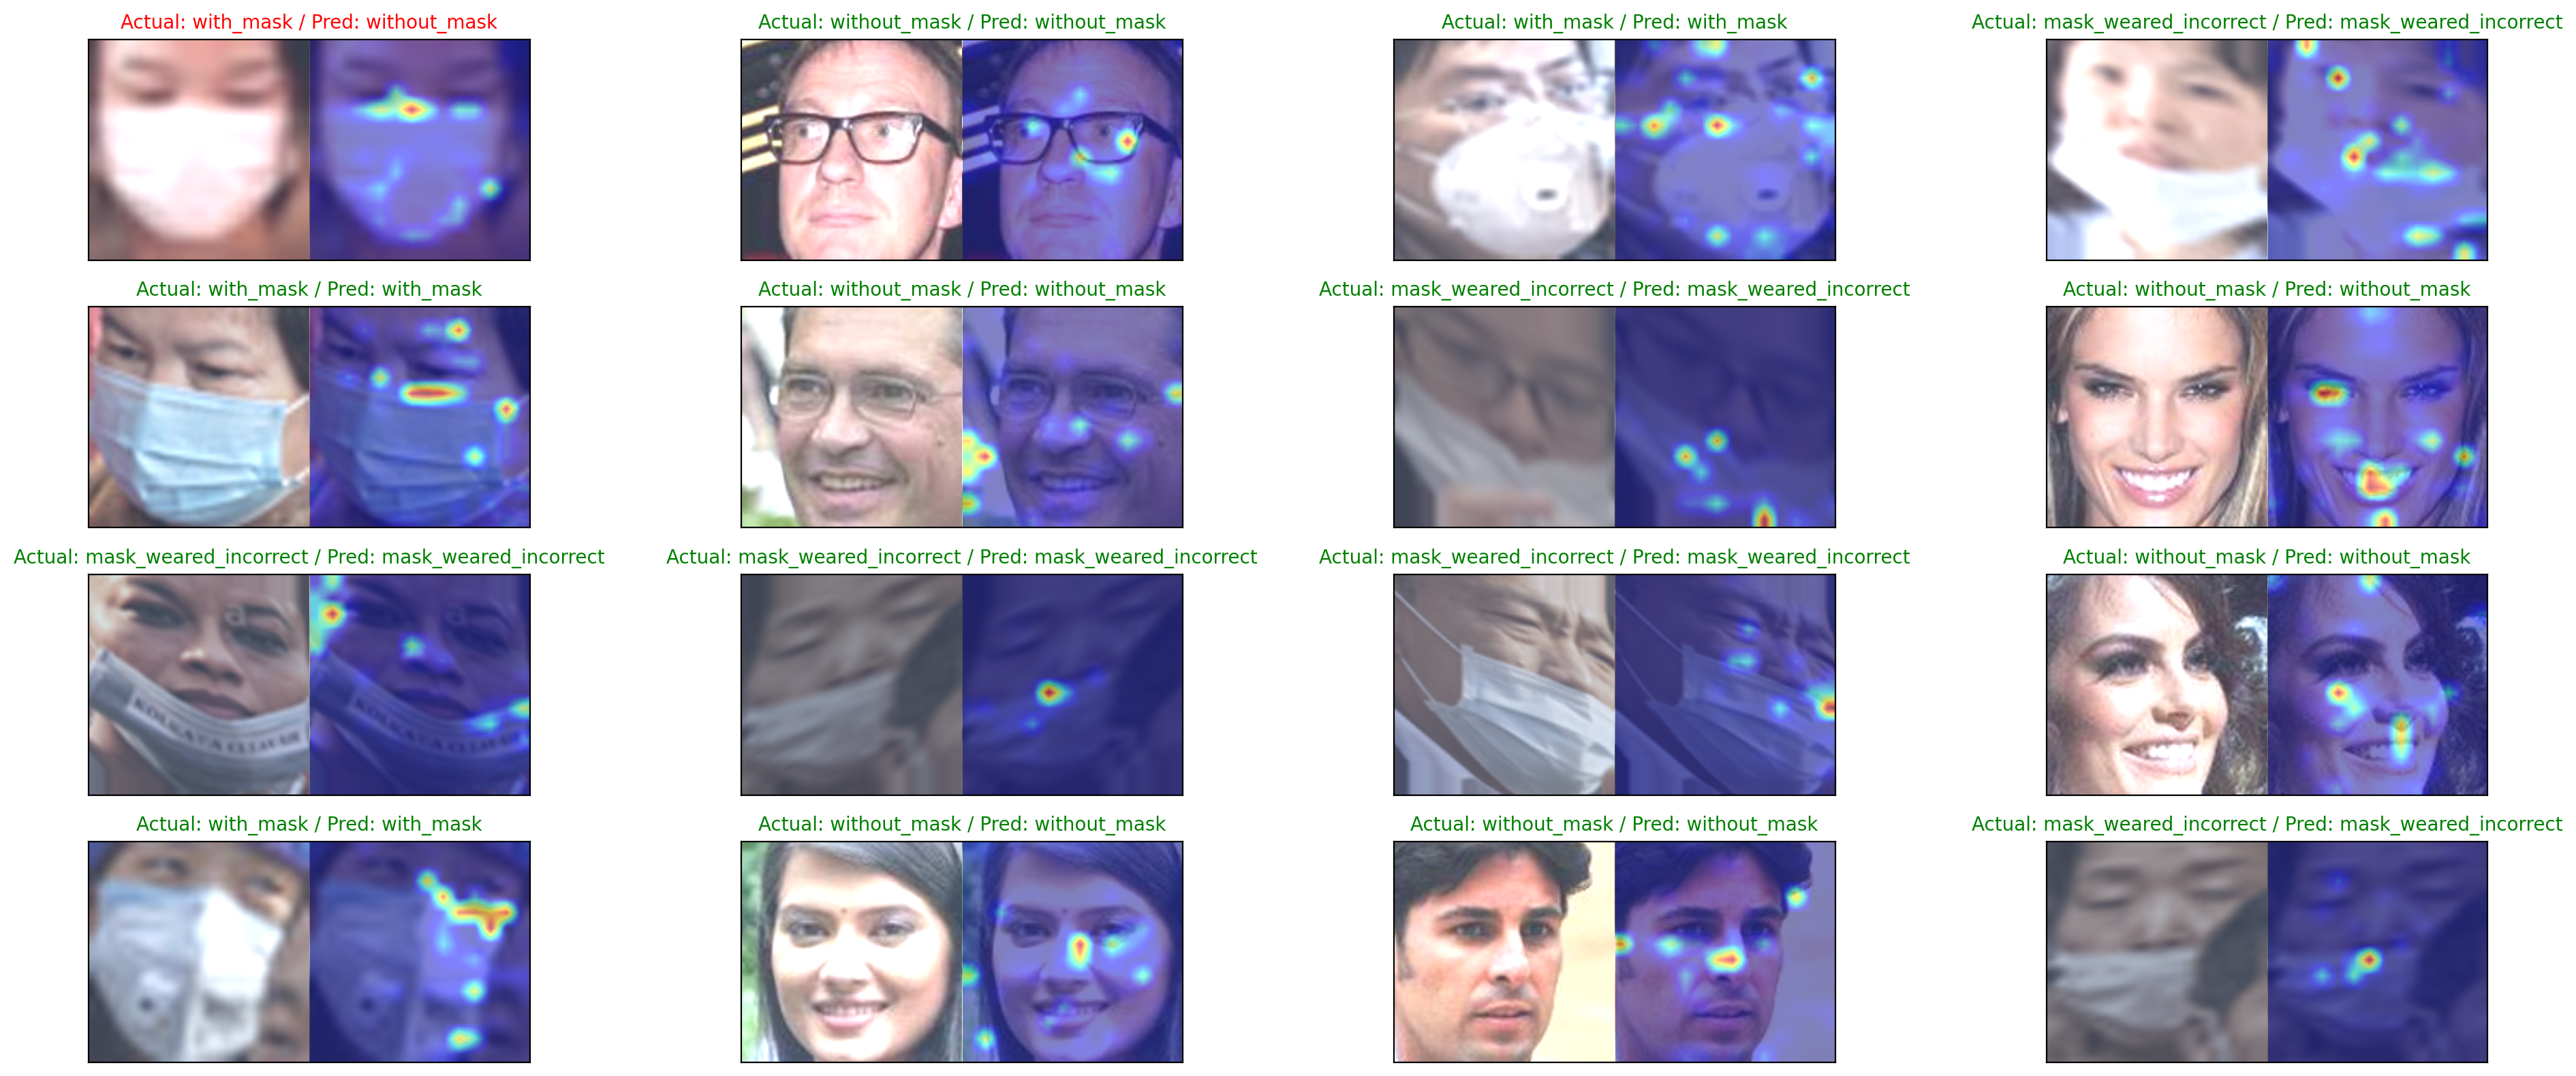

In [39]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(20, 8),dpi=200)
mask = np.concatenate([np.ones((224, 224)), np.zeros((224, 224))],
axis=1)

for i in range(16):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    imgs = np.concatenate((img[i].cpu(), img[i].cpu()), axis=-1)
    ax.imshow(((imgs*0.5)+0.5).transpose(1,2,0)/2+0.5)
    extended_attention_map = np.concatenate((np.zeros((224, 224)), attention_map[i].cpu()), axis=1)
    extended_attention_map = np.ma.masked_where(mask==1, extended_attention_map)
    ax.imshow(extended_attention_map, alpha=0.5, cmap='jet')
    ax.set_title(f"Actual: {idx_to_class[lab[i].item()]} / Pred: {idx_to_class[predictions[i].item()]}", color=("green" if lab[i]==predictions[i] else "red"), fontsize=10)

plt.tight_layout()